### Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Daten erzeugen

In [15]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
y = np.array([2, 3, 4, 15, 4, 7, 8, 6, np.nan, np.nan, np.nan, 10, 14, 12, np.nan, 1, 10, 7, 6, 5])

## Plot

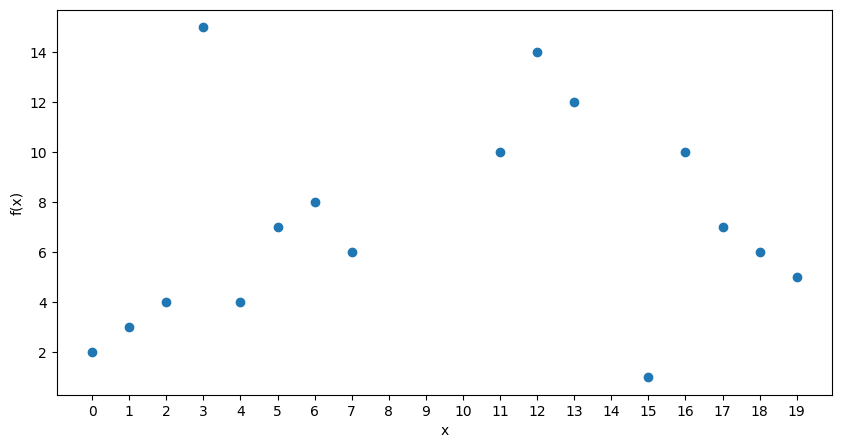

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('f(x)')

ax.set_xticks(x)
ax.set_xticklabels(x)

plt.show()

## Aufgabe 1

In [42]:
def linear_regression(x, y):
    """
    Berechnet die Koeffizienten einer linearen Regression auf den gegebenen Daten.

    Parameter:
    x (ndarray): Ein Array von X-Koordinaten.
    y (ndarray): Ein Array von Y-Koordinaten.

    Rückgabe:
    a (ndarray): Ein Array von Koeffizienten der Regressionsgerade.
    mse (float): Die mittlere quadratische Abweichung zur Regressionsgerade.

    Matrix Y wird als eine 2-dimensionale NumPy-Array definiert, 
    die aus den X-Koordinaten und einer Spalte von Einsen besteht. Y.T entspricht dann dem Y aus Seite 11 der Vorlesung.
    Dann werden die Koeffizienten der Regressionsgerade als a = inv(Y^T * Y) * Y berechnet.
    """

    # Entferne fehlende Werte aus den Daten
    mask = ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    # Erzeuge die Matrix Y aus X und einer Spalte von Einsen
    ones = np.ones_like(x_clean)
    Y = np.column_stack((x_clean, ones))

    # Berechne die Koeffizienten der linearen Regression
    Y_T = Y.T
    a = np.linalg.inv(Y_T.dot(Y)).dot(Y_T).dot(y_clean)

    # Berechne die mittlere quadratische Abweichung zur Regressionsgerade
    y_pred = Y.dot(a)
    mse = np.mean((y_clean - y_pred) ** 2)

    # Gib die Koeffizienten und die mittlere quadratische Abweichung aus
    return a, mse

def generate_cost_function(coeff, mse):
    """
    Generiert eine Gütefunktion für die lineare Regression.

    Parameter:
    coeff (ndarray): Ein Array von Koeffizienten der Regressionsgerade.
    mse (float): Die mittlere quadratische Abweichung zur Regressionsgerade.

    Rückgabe:
    a1 (ndarray): Ein Array von Werten für den Koeffizienten a1.
    a0 (ndarray): Ein Array von Werten für den Koeffizienten a0.
    mse_paraboloid (ndarray): Ein Array von Werten für die mittlere quadratische Abweichung zur Regressionsgerade,
        berechnet als Funktion von a1 und a0.

    mse_paraboloid ist eine Approximation der Gütefunktion J(a_1, a_0) durch eine parabolische Funktion. 
    Die Gütefunktion J(a_1, a_0) ist eine Funktion von a_1 und a_0, die den mittleren quadratischen Abstand 
    zwischen der Regressionsgeraden und den tatsächlichen Datenpunkten angibt.

    Die Idee, eine parabolische Funktion zur Approximation der Gütefunktion zu verwenden, beruht auf der Annahme, 
    dass die Gütefunktion in der Nähe des Schätzwertes der Koeffizienten coeff ein Minimum aufweist. Dieses Minimum wird durch die 
    parabolische Funktion approximiert.

    Um die parabolische Funktion zu erzeugen, wird zuerst der Schätzwert der Koeffizienten coeff als Schwerpunkt der Parabel verwendet. 
    Dann wird um diesen Schwerpunkt eine Spanne von ±1 erzeugt und in 100 gleich große Schritte unterteilt, um die Werte für a_1 und a_0 
    zu erhalten. Schließlich wird für jedes Paar von a_1 und a_0 der Wert von J(a_1, a_0) durch die Formel 
    mse_paraboloid = mse_0 + (a1 - a1_0) ** 2 + (a0 - a0_0) ** 2 berechnet. 
    Dabei ist mse_0 die mittlere quadratische Abweichung zur Regressionsgerade an der Stelle coeff, a1_0 und a0_0 sind die Schätzwerte 
    für a_1 und a_0, und a1 und a0 sind die Werte, die um den Schwerpunkt der Parabel erzeugt wurden.
    """
    a1_0 = coeff[0]
    a0_0 = coeff[1]
    mse_0 = mse

    a1 = np.linspace(a1_0 - 1, a1_0 + 1, 100)
    a0 = np.linspace(a0_0 - 1, a0_0 + 1, 100)
    a1, a0 = np.meshgrid(a1, a0)

    mse_paraboloid = mse_0 + (a1 - a1_0) ** 2 + (a0 - a0_0) ** 2
    
    return a1, a0, mse_paraboloid

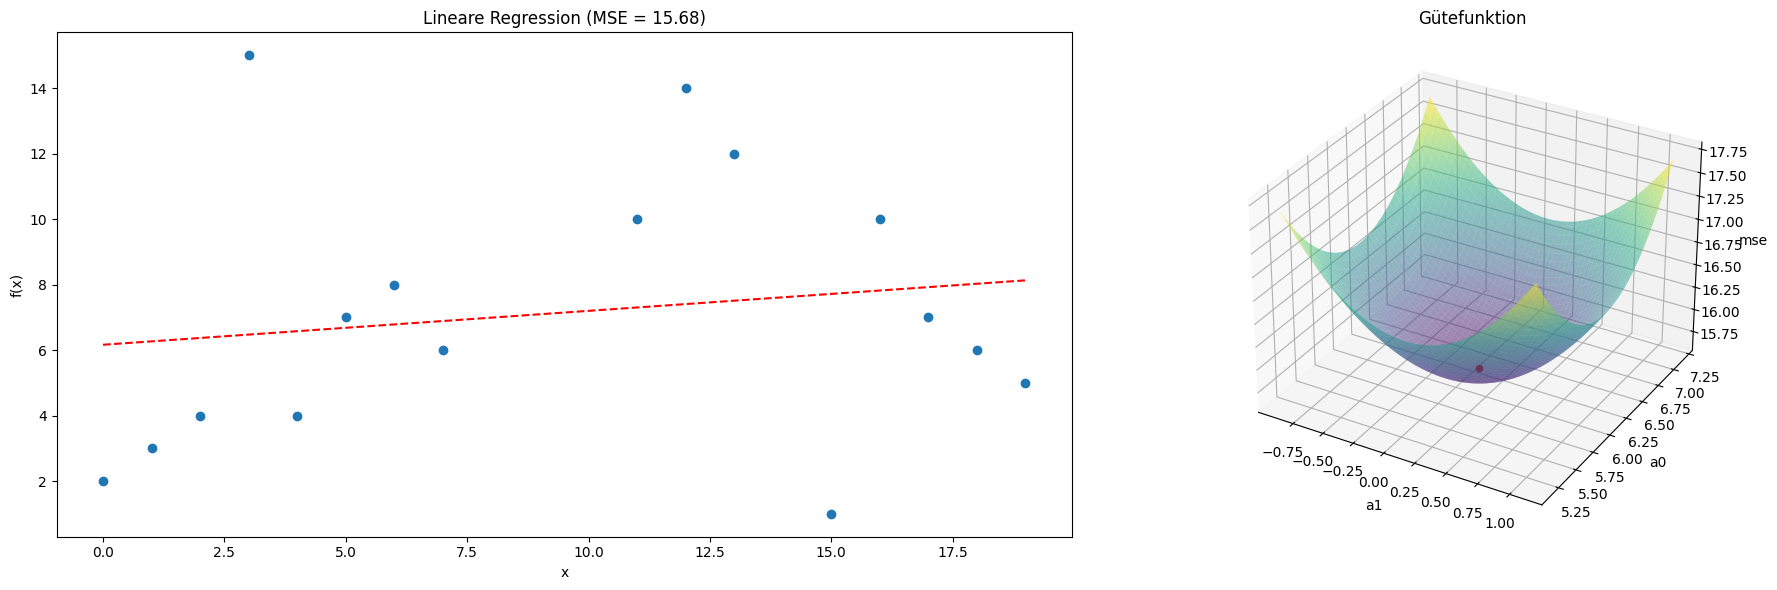

In [57]:
# Berechne die lineare Regression
coeff, mse = linear_regression(x=x, y=y)
y_pred = coeff[0] * x + coeff[1]

# Erzeuge die parabolische Gütefunktion
a1, a0, mse_paraboloid = generate_cost_function(coeff, mse)

# Erzeuge den Subplot mit beiden Plots
fig = plt.figure(figsize=(20, 6))

# Plot der Daten und Regressionsgerade
ax1 = fig.add_subplot(121)
ax1.scatter(x, y)
ax1.plot(x, y_pred, 'r--')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Lineare Regression (MSE = {:.2f})'.format(mse))

# 3D-Plot der Gütefunktion
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(a1, a0, mse_paraboloid, cmap='viridis', alpha=0.5)
ax2.scatter(coeff[0], coeff[1], mse, color='red')
ax2.set_xlabel('a1')
ax2.set_ylabel('a0')
ax2.set_zlabel('mse')
ax2.set_title('Gütefunktion')

plt.tight_layout()
plt.show()

## Kommentar zu den Ergebnissen

Aus den generierten Daten lässt sich kein klarer Funktionalszusammenhang erkennen. Sie scheinen zufällig und chaotisch zu sein. Daher ist es schwierig, ein lineares Modell zu finden, das die Beziehung zwischen x und y genau beschreibt.

Die durchgeführte lineare Regression liefert eine dennoch einen Funktionalzusammenhang und somit eine Regressionsgerade, die die Daten in beschreibt. Allerdings sind die Datenpunkte sehr weit von der Regressionsgerade entfernt, was darauf hinweist, dass die lineare Regression nicht das beste Modell für diese Daten ist. 

Der MSE ist relativ groß im Verhältnis zu dem Bereich der y-Werte, was ebenfalls darauf hindeutet, dass ein linearer Zusammenhang für diese Daten ungeeignet ist. 

## Aufgabe 2